# What are the major factors that contribute to an employee leaving the company?

In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [101]:
sns.set_style('white', {'axis.grid': False})

In [102]:
df = pd.read_csv('hr.csv')

In [103]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [104]:
print 'SALES'
print df['sales'].unique()
print '=========='
print 'SALARIES'
print df['salary'].unique()

SALES
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
SALARIES
['low' 'medium' 'high']


In [105]:
def countplotter(data, axis_label, rotation=0, invert=False):
    plt.figure(figsize=(13,7))
    plt.title(axis_label + ' Count\n', fontsize=30)
    if invert == True:
        sns.countplot(y=data)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel('\nCount', fontsize=25)
        plt.ylabel(axis_label + '\n', fontsize=25)
    else:
        sns.countplot(x=data)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)        
        plt.xlabel('\n' + axis_label, fontsize=25)
        plt.ylabel('Count\n', fontsize=25)

# UNIVARIATE

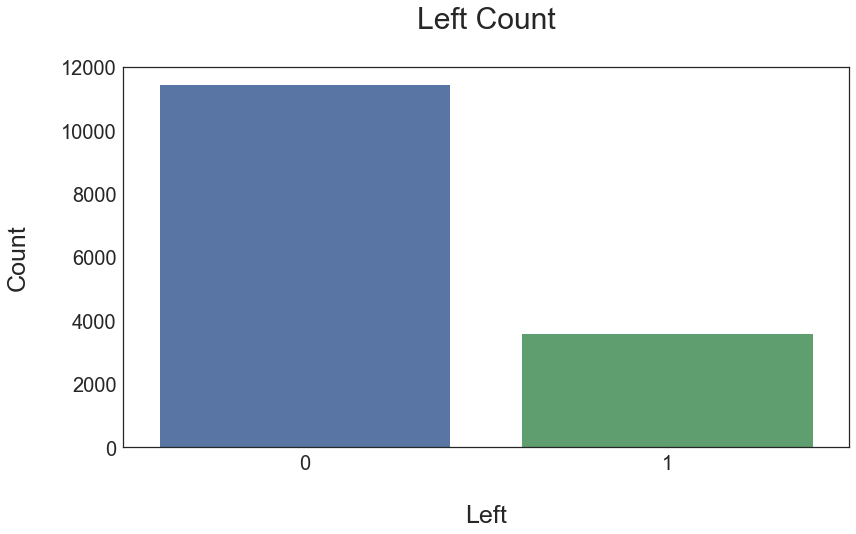

In [106]:
countplotter(df['left'], 'Left')

In [107]:
n_total = len(df["left"])
n_left = len(df["left"][df["left"] == 1])
n_stayed = len(df["left"][df["left"] == 0])

print "A naive classifier would have an accuracy of {}%".format(np.round(100 * n_stayed/float(n_total), 2))

A naive classifier would have an accuracy of 76.19%


### Lots of low income earners. How many of each income group decided to leave?

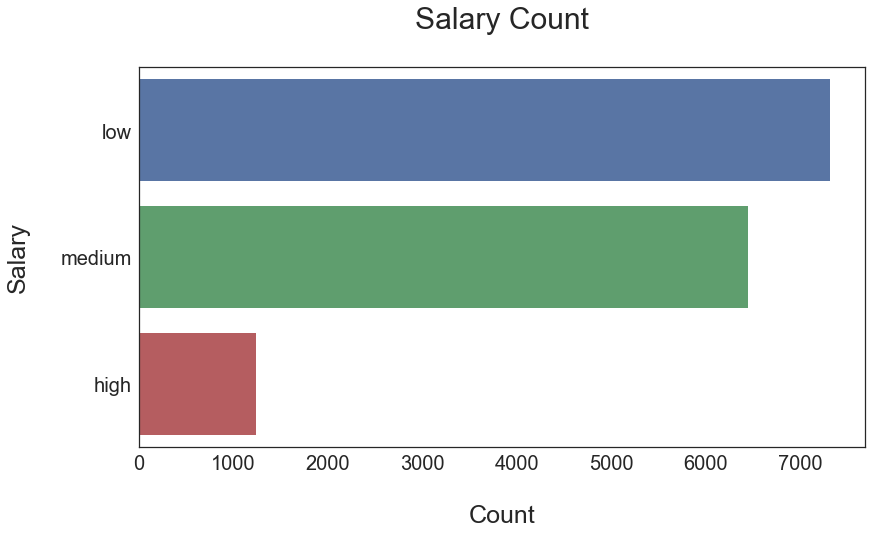

In [108]:
countplotter(df['salary'], 'Salary', invert=True)

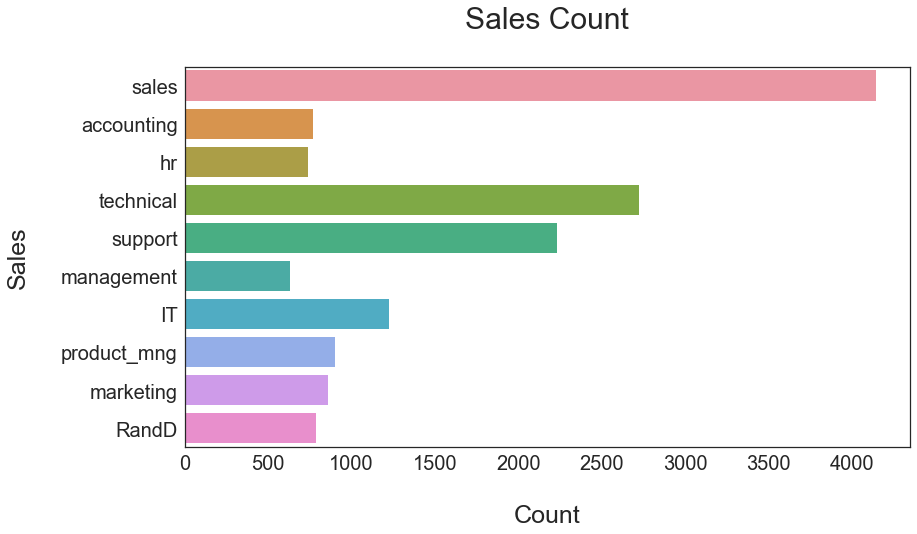

In [109]:
countplotter(df['sales'], 'Sales', invert=True)

### There's a dip before 0.5. Could that be where most left the company?

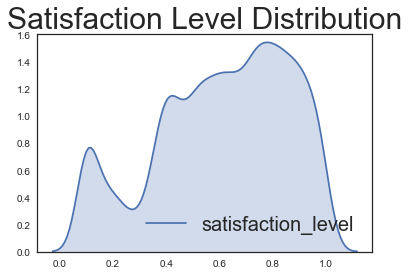

In [110]:
plt.title('Satisfaction Level Distribution', fontsize=30)
plt.ylim([0, 1.6])
sns.kdeplot(df['satisfaction_level'], shade=True)
plt.legend(fontsize=20)

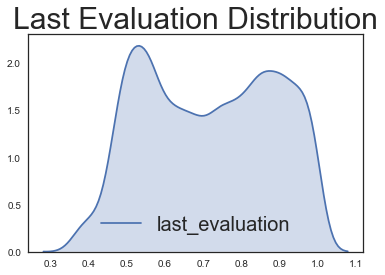

In [111]:
plt.title('Last Evaluation Distribution', fontsize=30)
plt.ylim([0, 2.3])
sns.kdeplot(df['last_evaluation'], shade=True)
plt.legend(fontsize=20)

### Could the number of projects cause burnout thus incentivizing employees to leave the company? Very few people were given more than 5 projects.

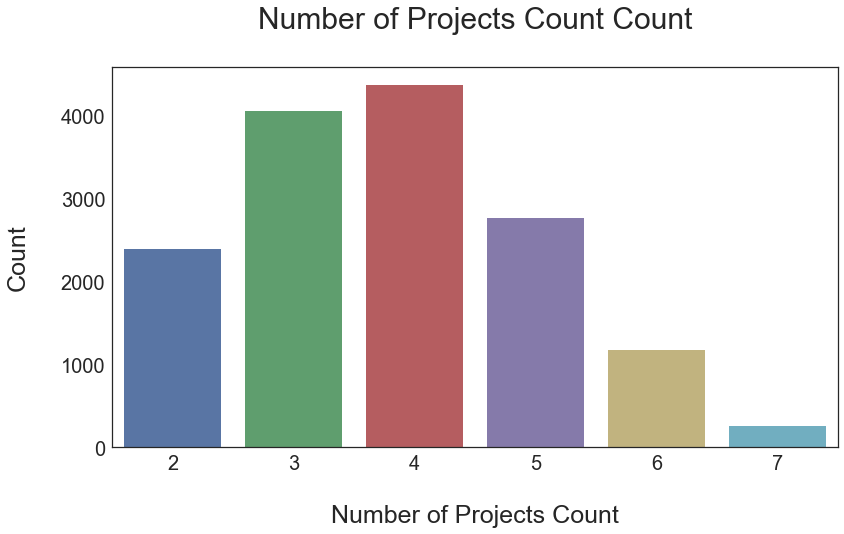

In [112]:
countplotter(df['number_project'], 'Number of Projects Count', rotation=0, invert=False)

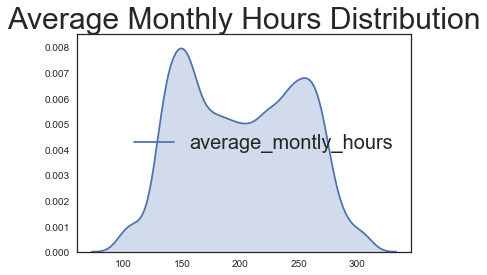

In [113]:
plt.title('Average Monthly Hours Distribution', fontsize=30)
plt.ylim([0, 0.0085])
sns.kdeplot(df['average_montly_hours'], shade=True)
plt.legend(fontsize=20)

### What is the threshold year for quitting?

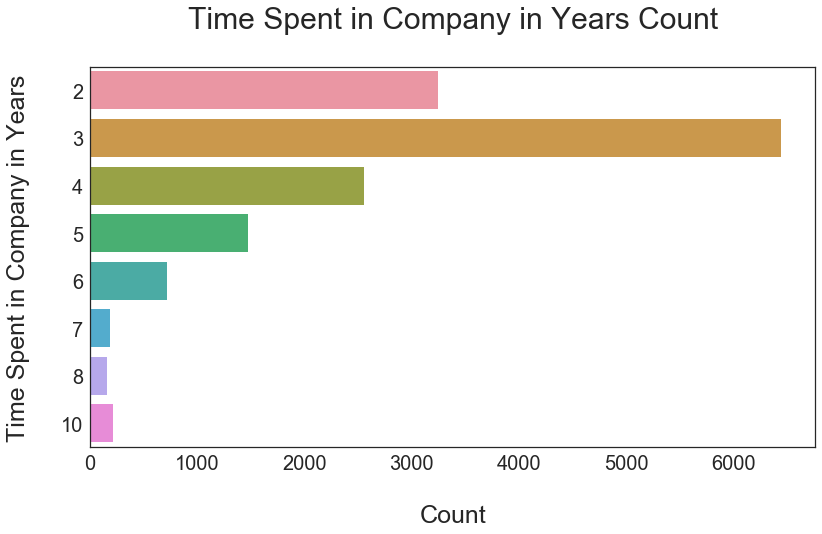

In [114]:
countplotter(df['time_spend_company'], 'Time Spent in Company in Years', invert=True)

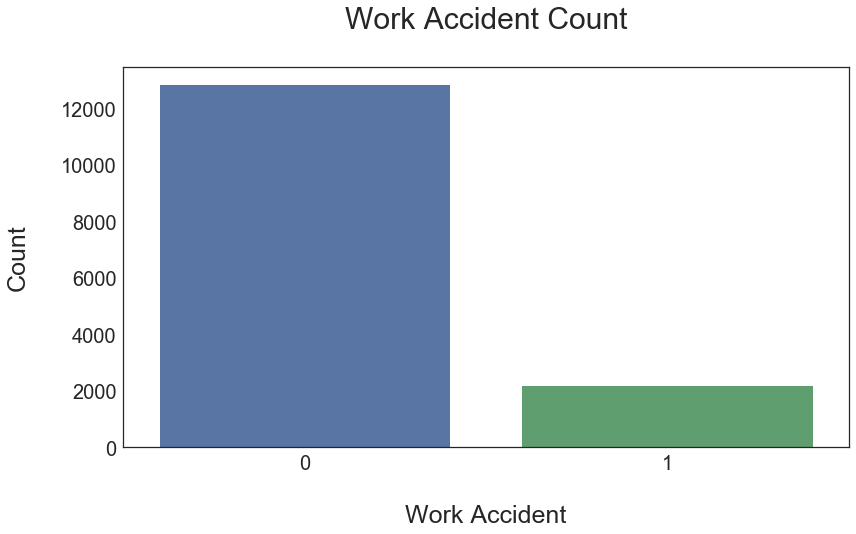

In [115]:
countplotter(df['Work_accident'], 'Work Accident')

### Interesting! A lot of people did not get promoted! How many of them left? How many of those not promoted left and were in the company for less than 3 years?

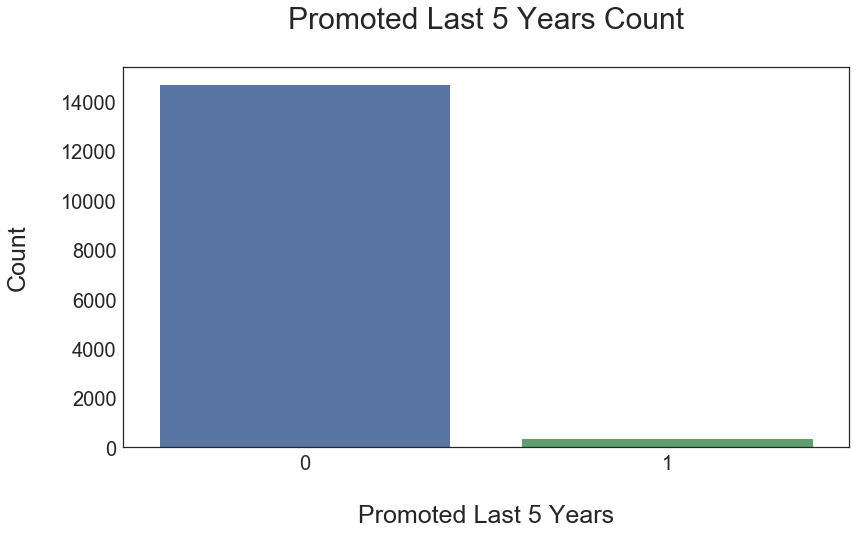

In [116]:
countplotter(df['promotion_last_5years'], 'Promoted Last 5 Years')

# BIVARIATE ANALYSIS

<h2>Accumulated Questions</h2>

<ol>
<strong><li>Lots of low income earners. How many of each income group decided to leave?</li></strong>
<strong><li>There's a dip before 0.5 at the satisfaction level distribution. Could that be where most left the company?</li></strong>
<strong><li>Could the number of projects cause burnout thus incentivizing employees to leave the company? Very few people were given more than 5 projects.</li></strong>
<strong><li>What is the threshold year in time spent in the company for quitting?</li></strong>
<strong><li>Interesting! A lot of people did not get promoted! How many of them left? How many of those not promoted left and were in the company for less than 3 years?</li></strong>
<strong><li>What's the difference between the two peaks of the average monthly hours distribution?</li></strong>
</ol>

In [117]:
def bivariate_countplotter(dataframe, column_name, hue_name, legend_name='', rotation=0, invert=False, legend_location='upper right'):
    plt.figure(figsize=(13,7))
    plt.title(column_name + ' count\n', fontsize=30)
    if invert == True:
        sns.countplot(y=column_name, hue=hue_name, data=dataframe)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel('\ncount', fontsize=25)
        plt.ylabel(column_name + '\n', fontsize=25)
    else:
        sns.countplot(x=column_name, hue=hue_name, data=dataframe)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)        
        plt.xlabel('\n' + column_name, fontsize=25)
        plt.ylabel('count\n', fontsize=25)
    legend = plt.legend(title=legend_name, loc=legend_location, fontsize=25)
    plt.setp(legend.get_title(),fontsize=25)

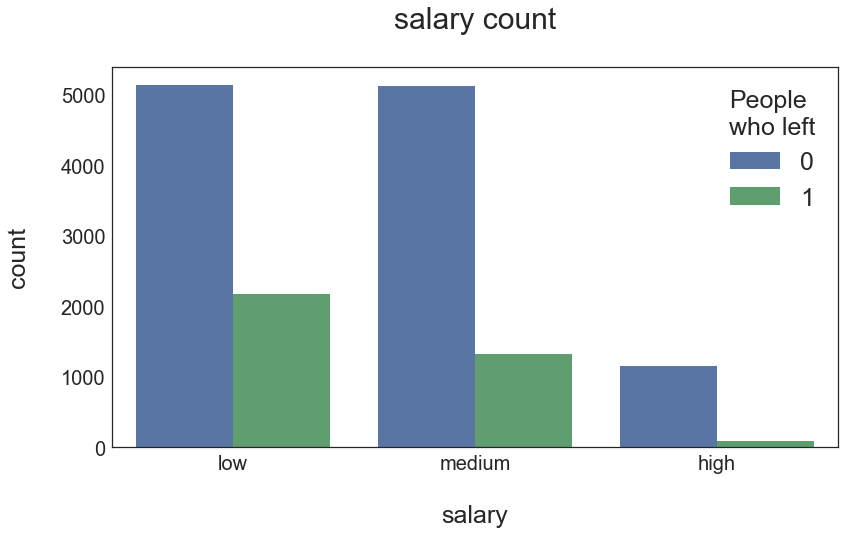

In [118]:
bivariate_countplotter(df, 'salary', 'left', legend_name='People\nwho left')

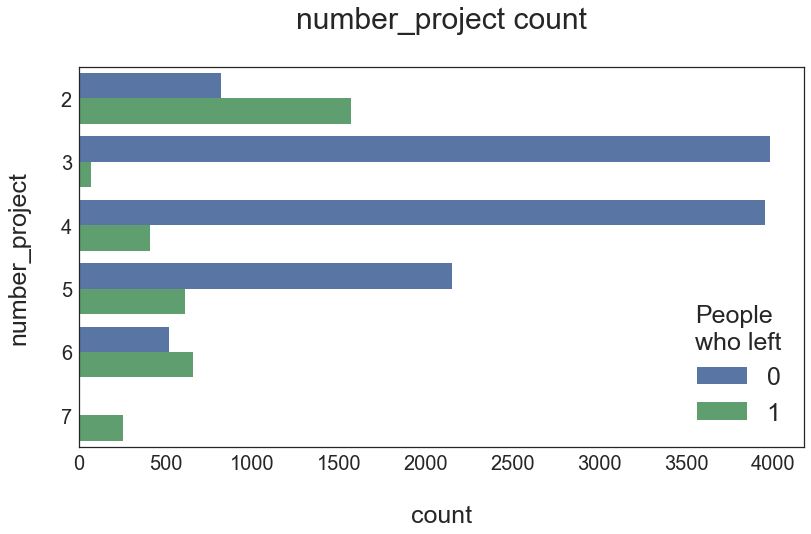

In [119]:
bivariate_countplotter(df, 'number_project', 'left', legend_name="People\nwho left", legend_location='lower right', invert=True)

### Seems that a lot of people leave after spending three years in office. How many of those were never promoted?

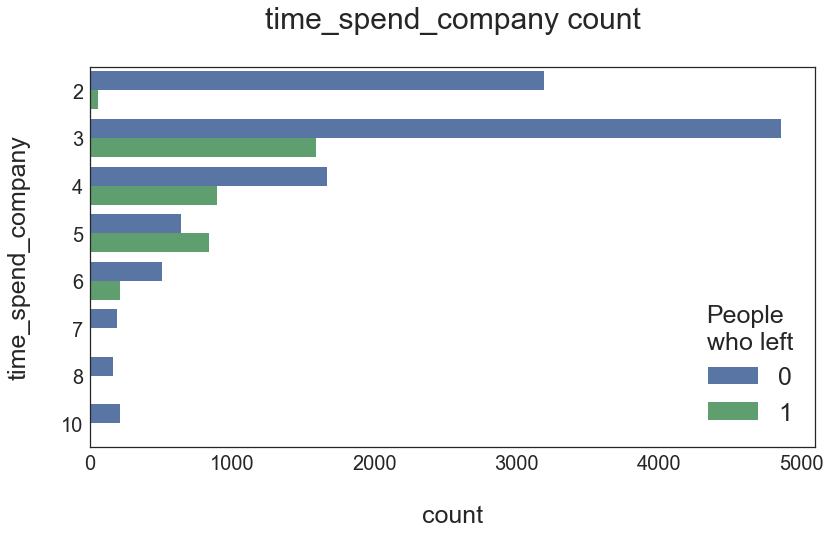

In [120]:
bivariate_countplotter(df, 'time_spend_company', 'left', legend_name="People\nwho left", legend_location="lower right", invert=True)

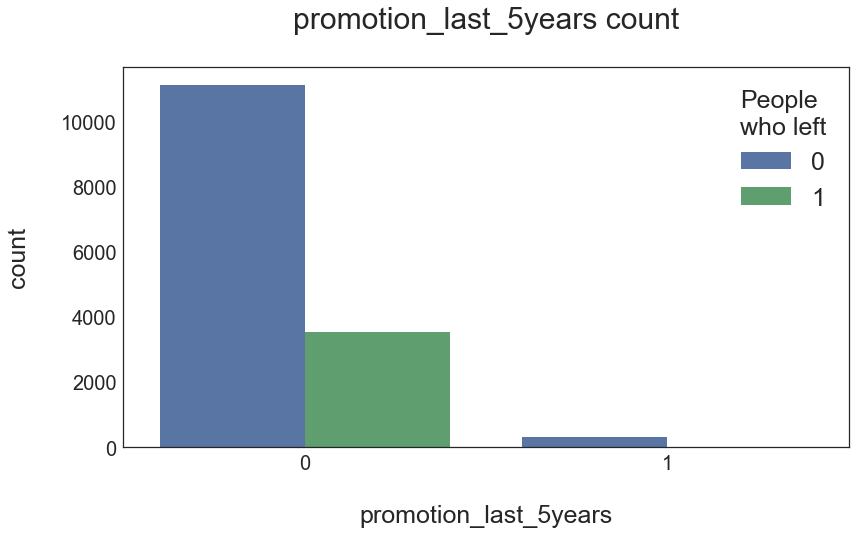

In [121]:
# A lot of people did not get promoted! How many of them left? How many of those not promoted left and were in the company for less than 3 years?

bivariate_countplotter(df, 'promotion_last_5years', 'left', legend_name="People\nwho left", legend_location="upper right")

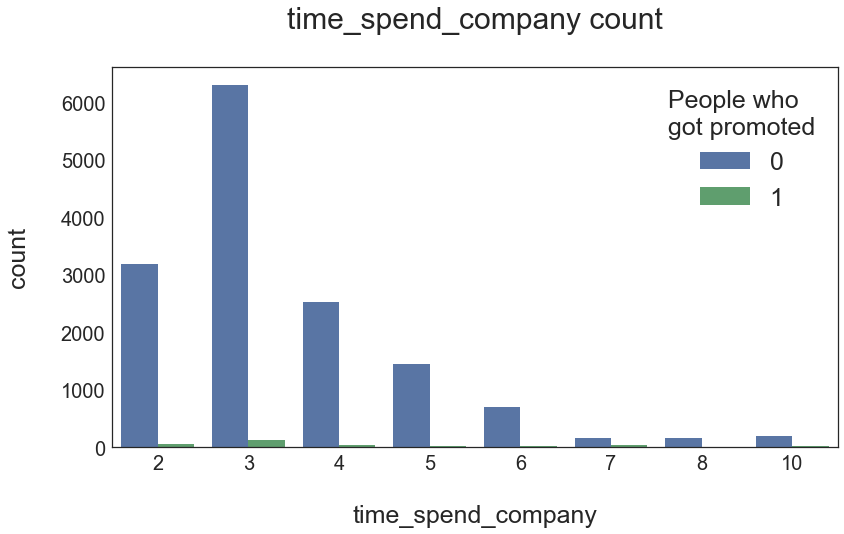

In [122]:
bivariate_countplotter(df, 'time_spend_company', 'promotion_last_5years', legend_name="People who\ngot promoted", legend_location="upper right")

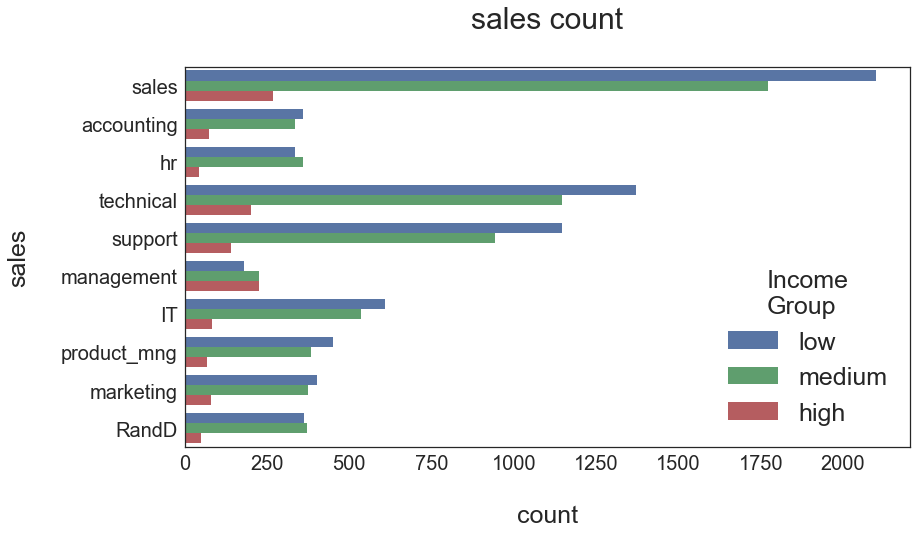

In [123]:
bivariate_countplotter(df, 'sales', 'salary', legend_name="Income\nGroup", legend_location="lower right", invert=True)

### Semi-Insight: Lower income and middle income people work more hours than higher income earners. 

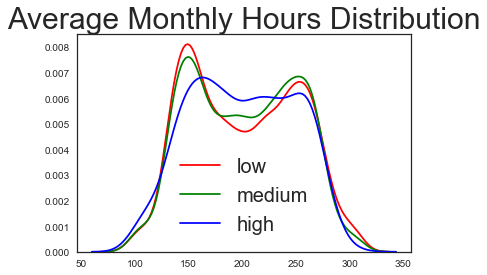

In [124]:
plt.title('Average Monthly Hours Distribution', fontsize=30)
plt.ylim([0, 0.0085])
sns.kdeplot(df['average_montly_hours'][df['salary'] == 'low'], label='low', color='red')
sns.kdeplot(df['average_montly_hours'][df['salary'] == 'medium'], label='medium', color='green')
sns.kdeplot(df['average_montly_hours'][df['salary'] == 'high'], label='high', color='blue')
plt.legend(fontsize=20)

### There's also a binary nature when it comes to work hours of those who stayed.

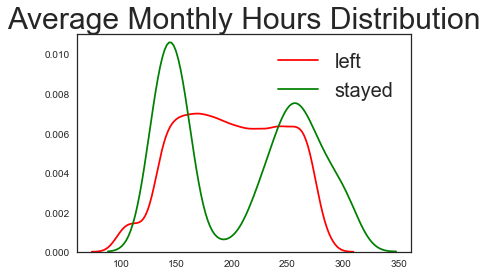

In [125]:
plt.title('Average Monthly Hours Distribution', fontsize=30)
plt.ylim([0, 0.011])
sns.kdeplot(df['average_montly_hours'][df['left'] == 0], label='left', color='red')
sns.kdeplot(df['average_montly_hours'][df['left'] == 1], label='stayed', color='green')
plt.legend(fontsize=20)

In [126]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


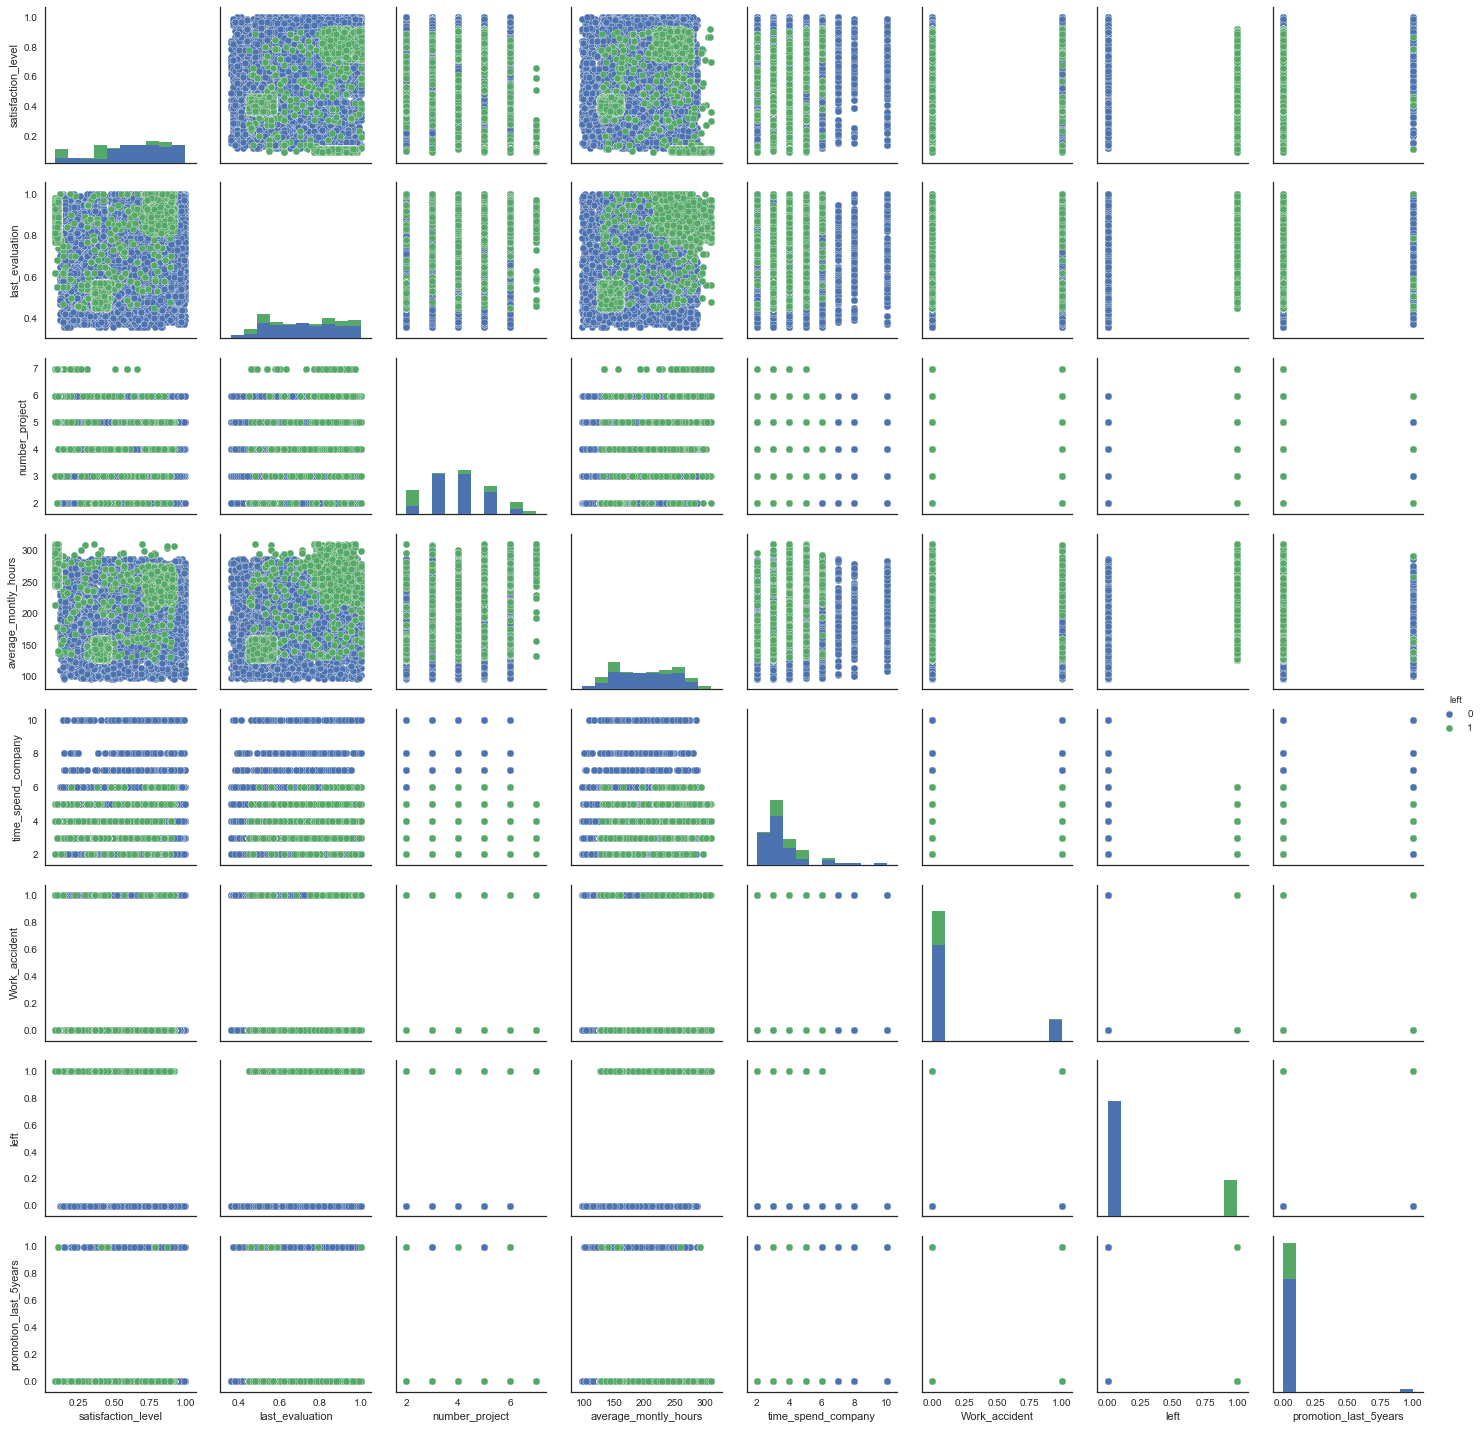

In [127]:
sns.pairplot(df, hue="left")

<h3>INSIGHTS</h3>
<ol>
<li><h4>Regardless of the satisfaction level or with the last evaluation, people leave IF they were not given a promotion within the last 5 years.</h4></li>
<li><h4>The longer you stay, the more likely you are to not leave the company (job security and promotion?). Regardless of working hours or satisfaction level.</h4></li>
</ol>

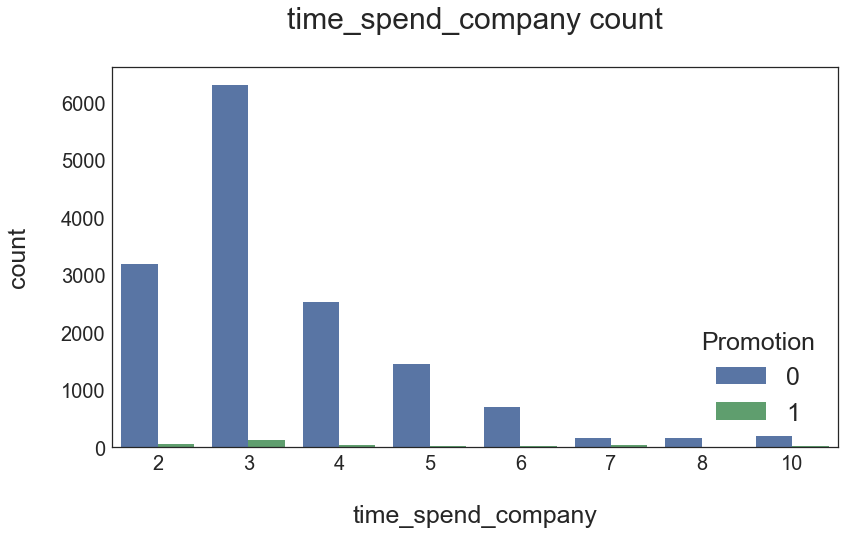

In [128]:
bivariate_countplotter(df, 'time_spend_company', 'promotion_last_5years', legend_name="Promotion", legend_location="lower right")

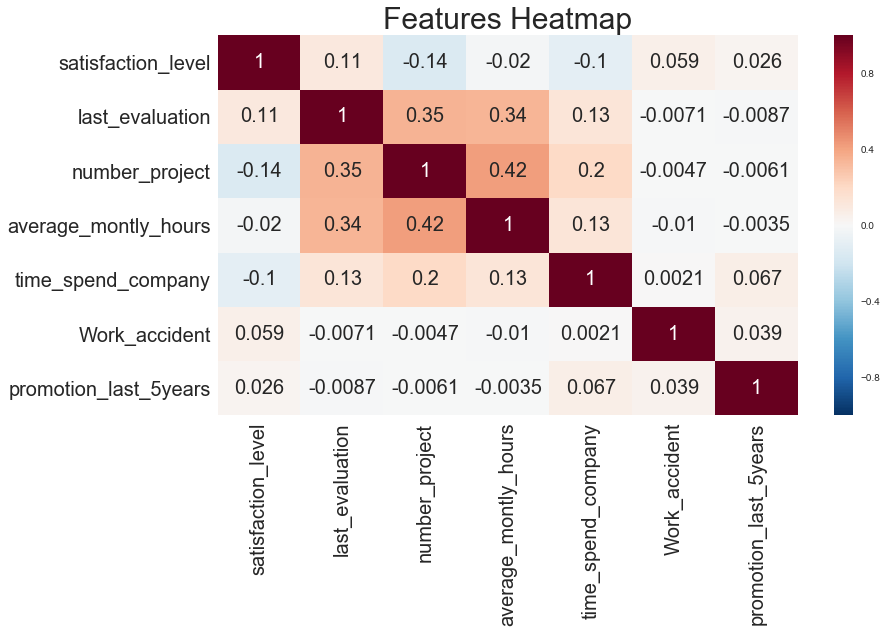

In [129]:
plt.figure(figsize=(13,7))
corr_matrix = df.drop(["left", "sales", "salary"], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 20})

plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.title("Features Heatmap", fontsize=30)

### INSIGHT: No features are all that correlated with each other. This is good!

# MULTIVARIATE ANALYSIS

## SALARY ENTITY

### Time Spent in the Company

### INSIGHT: People expect to receive low income for the first two years or so. If after that time, their income is still low, people leave.

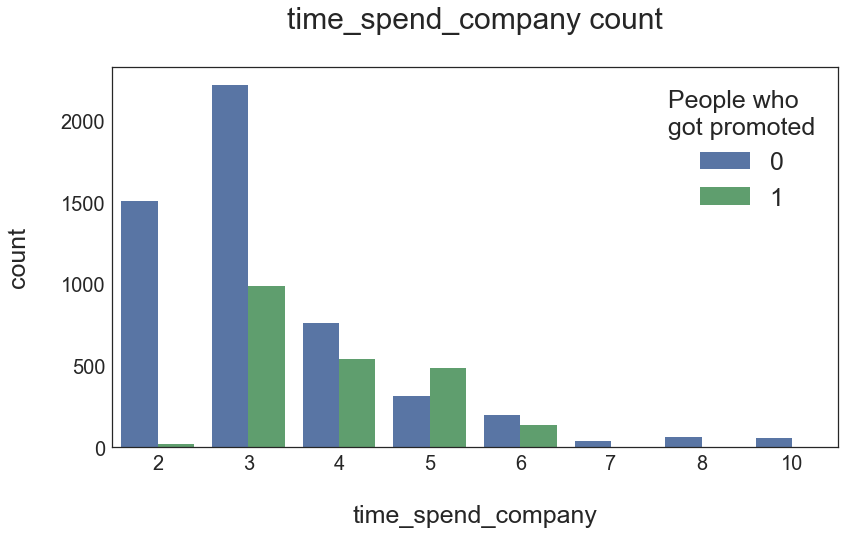

In [130]:
bivariate_countplotter(df[df['salary'] == 'low'], 'time_spend_company', 'left', legend_name="People who\ngot promoted", legend_location="upper right")

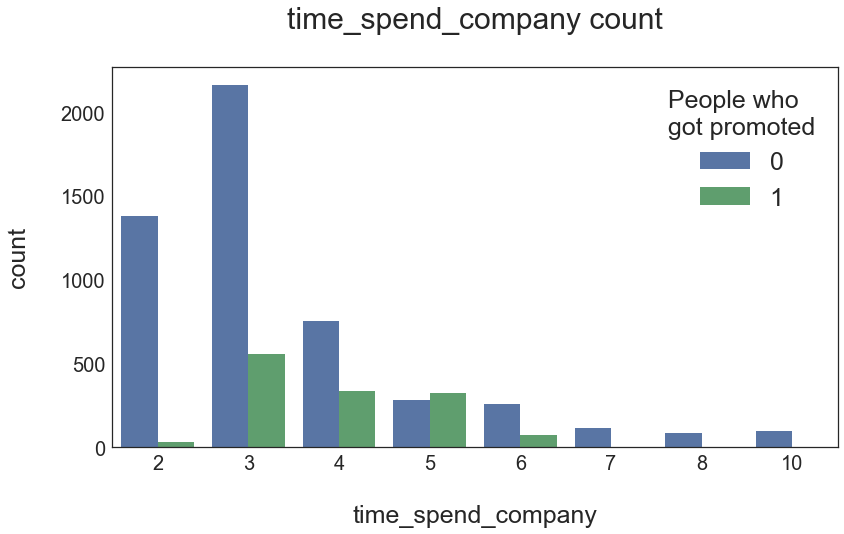

In [131]:
bivariate_countplotter(df[df['salary'] == 'medium'], 'time_spend_company', 'left', legend_name="People who\ngot promoted", legend_location="upper right")

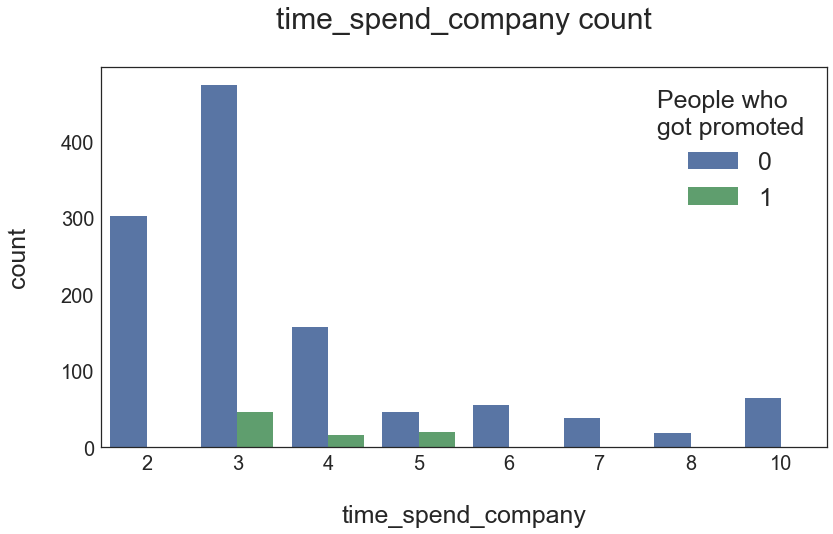

In [132]:
bivariate_countplotter(df[df['salary'] == 'high'], 'time_spend_company', 'left', legend_name="People who\ngot promoted", legend_location="upper right")

### By Job Position

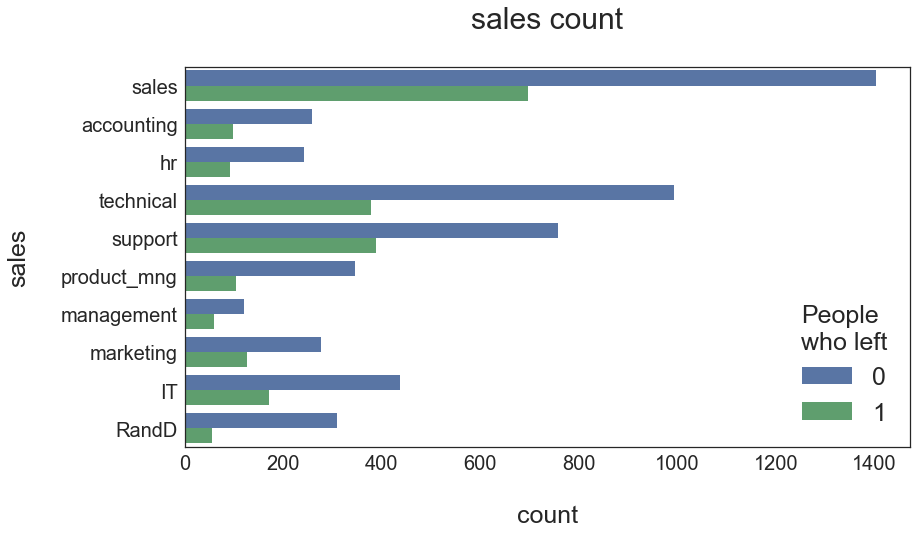

In [133]:
bivariate_countplotter(df[df['salary'] == 'low'], 'sales', 'left', invert=True, legend_name="People\nwho left", legend_location="lower right")

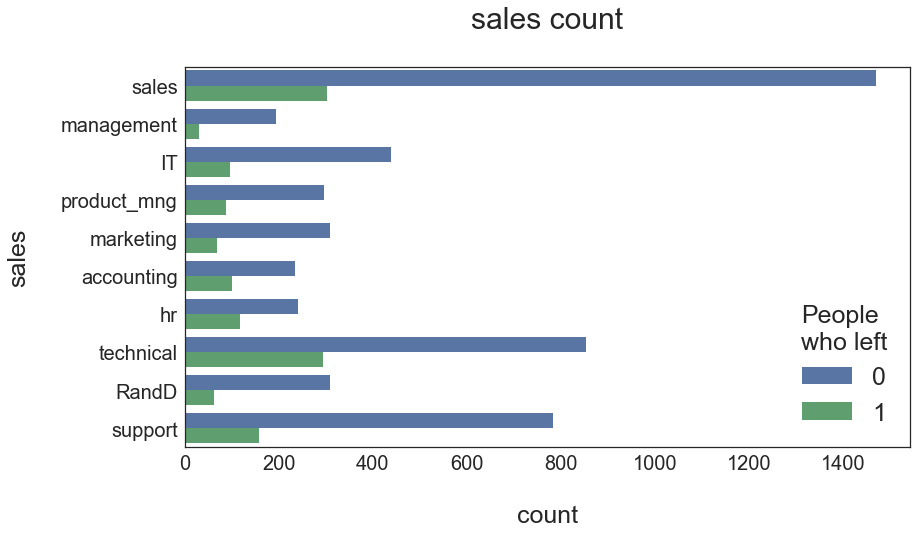

In [134]:
bivariate_countplotter(df[df['salary'] == 'medium'], 'sales', 'left', invert=True, legend_name="People\nwho left", legend_location="lower right")

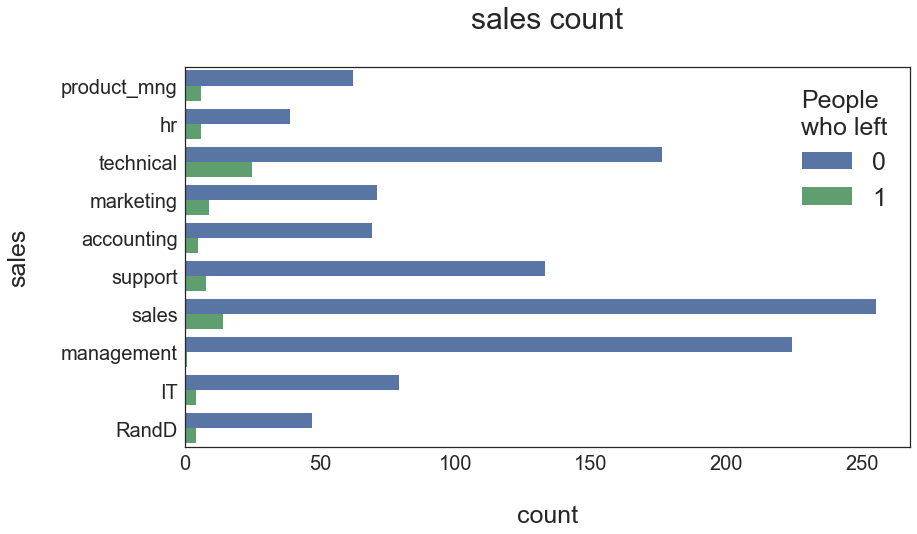

In [135]:
bivariate_countplotter(df[df['salary'] == 'high'], 'sales', 'left', invert=True, legend_name="People\nwho left", legend_location="upper right")

In [136]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


### Semi-Conclusion: It's either you love it or you hate it.

[None, None]

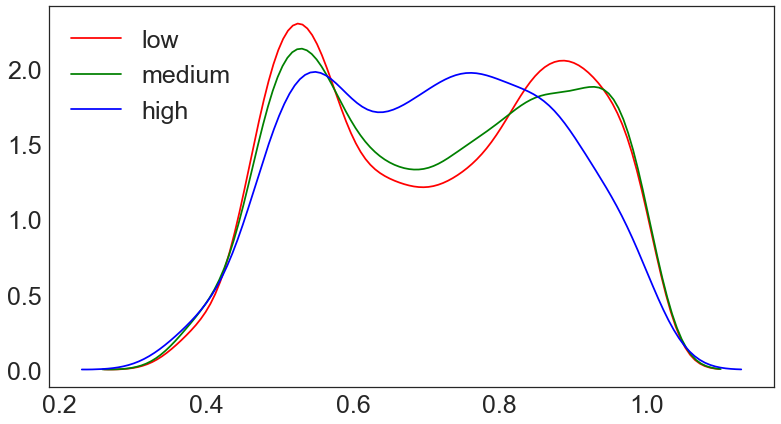

In [137]:
plt.figure(figsize=(13,7))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

sns.kdeplot(df['last_evaluation'][(df['salary'] == 'low') & (df['time_spend_company'] >= 3)], color='red', label="low")
sns.kdeplot(df['last_evaluation'][(df['salary'] == 'medium') & (df['time_spend_company'] >= 3)], color='green', label="medium")
sns.kdeplot(df['last_evaluation'][(df['salary'] == 'high') & (df['time_spend_company'] >= 3)], color='blue', label="high")

legend = plt.legend(fontsize=25)
plt.setp(legend.get_title(),fontsize=25)

[None, None]

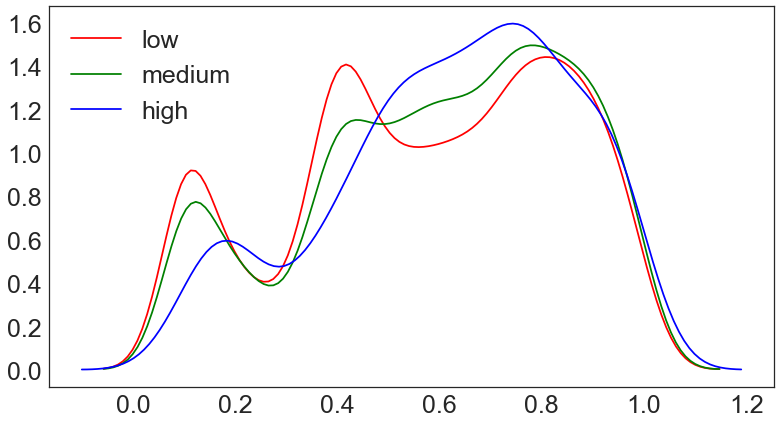

In [138]:
plt.figure(figsize=(13,7))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

sns.kdeplot(df['satisfaction_level'][(df['salary'] == 'low') & (df['time_spend_company'] >= 3)], color='red', label="low")
sns.kdeplot(df['satisfaction_level'][(df['salary'] == 'medium') & (df['time_spend_company'] >= 3)], color='green', label="medium")
sns.kdeplot(df['satisfaction_level'][(df['salary'] == 'high') & (df['time_spend_company'] >= 3)], color='blue', label="high")

legend = plt.legend(fontsize=25)
plt.setp(legend.get_title(),fontsize=25)

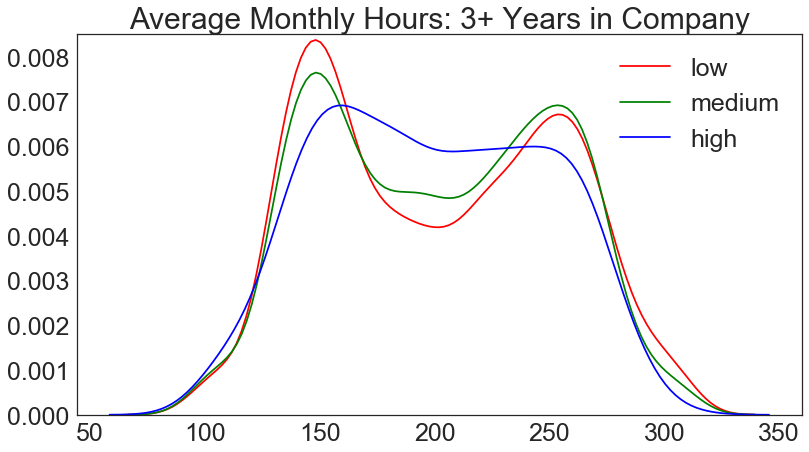

In [139]:
plt.figure(figsize=(13,7))

plt.title('Average Monthly Hours: 3+ Years in Company', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.ylim([0, 0.0085])
sns.kdeplot(df['average_montly_hours'][(df['salary'] == 'low') & (df['time_spend_company'] >= 3)], label='low', color='red')
sns.kdeplot(df['average_montly_hours'][(df['salary'] == 'medium') & (df['time_spend_company'] >= 3)], label='medium', color='green')
sns.kdeplot(df['average_montly_hours'][(df['salary'] == 'high') & (df['time_spend_company'] >= 3)], label='high', color='blue')

plt.legend(fontsize=25)

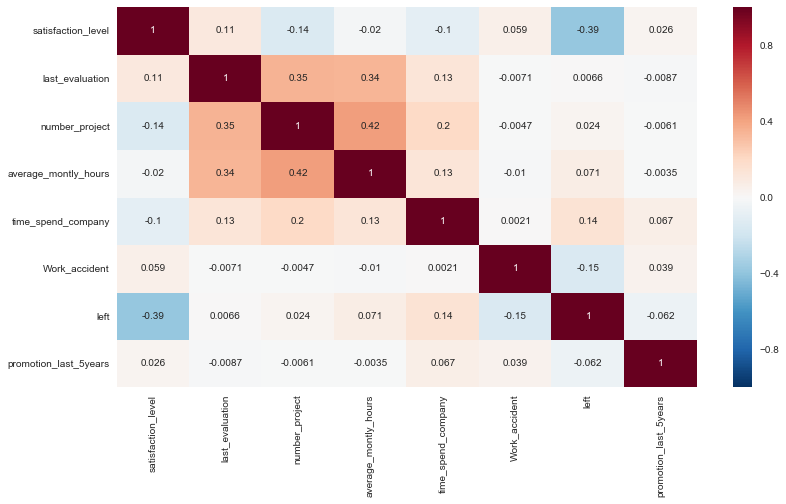

In [140]:
plt.figure(figsize=(13,7))
corr_matrix = df.drop(['sales', 'salary'], axis=1).corr()
# corr_matrix[np.abs(corr_matrix) < 0.6] = 0
sns.heatmap(corr_matrix, annot=True)

<h1>INSIGHTS</h1>

<ul>
<li>Higher income people are more likely to stay in a company than lower income people.</li>
<li>For all income groups, it's either you love it or you hate it in this company.</li>
<li>Majority of the people in the company who belong in the lower income tier group belong in sales, technical, and support. These positions also have the highest amounts of people who quit their job.</li>
<li>Higher Income people, on average, work less hours than middle and lower income people.</li>
</ul>

# Predictive Modeling

In [141]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [142]:
print df["sales"].unique()
print ""
print df["salary"].unique()

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

['low' 'medium' 'high']


In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

## Model 1 - Baseline

In [144]:
le_sales = LabelEncoder()
le_salary = LabelEncoder()
df["sales encoded"] = le_sales.fit_transform(df["sales"])
df["salary encoded"] = le_salary.fit_transform(df["salary"])

In [145]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales encoded,salary encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2


In [146]:
X = df.drop(["sales", "salary", "left"], axis=1)
X = X.as_matrix()
y = df["left"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [147]:
rf_1 = RandomForestClassifier()
rf_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [148]:
y_test_pred = rf_1.predict(X_test)
y_test_pred_proba = rf_1.predict_proba(X_test)

In [149]:
confusion_matrix(y_test, y_test_pred)

array([[2500,    8],
       [  38,  754]])

In [150]:
rf_1.score(X_test, y_test)

0.98606060606060608

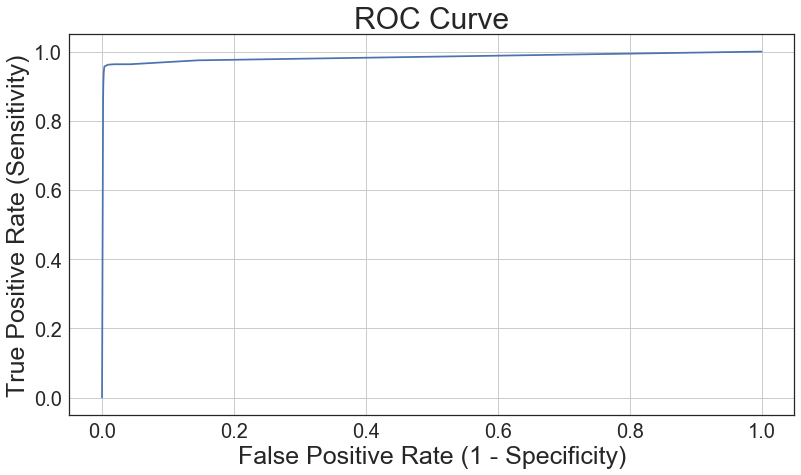

In [151]:
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_test_pred_proba[:,1])

plt.figure(figsize=(13, 7))

plt.plot(fpr_1, tpr_1)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=25)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=25)
plt.title('ROC Curve', fontsize=30)
plt.grid(True)

In [152]:
roc_auc_score(y_test, y_test_pred_proba[:,1])

0.98352443896702257

## Model 2 - Two Groups! Sales, Technical, and Support vs. Everyone Else!

In [153]:
# sales technical support
df["jobs encoded"] = df["sales"].apply(lambda x: 1 if ((x == "sales") or (x == "technical") or (x == "support")) else 0)

In [154]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales encoded,salary encoded,jobs encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1,1


In [155]:
X = df.drop(["sales", "salary", "left", "sales encoded"], axis=1)
X = X.as_matrix()
y = df["left"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [156]:
rf_2 = RandomForestClassifier()
rf_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [157]:
y_test_pred = rf_2.predict(X_test)
y_test_pred_proba = rf_2.predict_proba(X_test)

In [158]:
confusion_matrix(y_test, y_test_pred)

array([[2500,    8],
       [  37,  755]])

In [159]:
rf_2.score(X_test, y_test)

0.98636363636363633

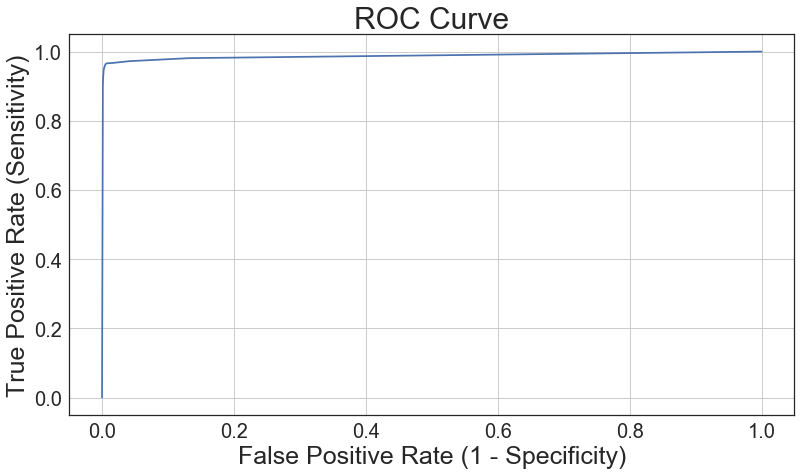

In [160]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_test_pred_proba[:,1])

plt.figure(figsize=(13, 7))

plt.plot(fpr_2, tpr_2)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=25)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=25)
plt.title('ROC Curve', fontsize=30)
plt.grid(True)

In [161]:
roc_auc_score(y_test, y_test_pred_proba[:,1])

0.98763401559454189

## Model 3 - Work Accident Is Irrelevant Anyway!

In [162]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales encoded,salary encoded,jobs encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1,1


In [163]:
X = df.drop(["sales", "salary", "left", "sales encoded", "Work_accident"], axis=1)
X = X.as_matrix()
y = df["left"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [164]:
rf_3 = RandomForestClassifier()
rf_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [165]:
y_test_pred = rf_3.predict(X_test)
y_test_pred_proba = rf_3.predict_proba(X_test)

In [166]:
confusion_matrix(y_test, y_test_pred)

array([[2501,    7],
       [  34,  758]])

In [167]:
rf_3.score(X_test, y_test)

0.98757575757575755

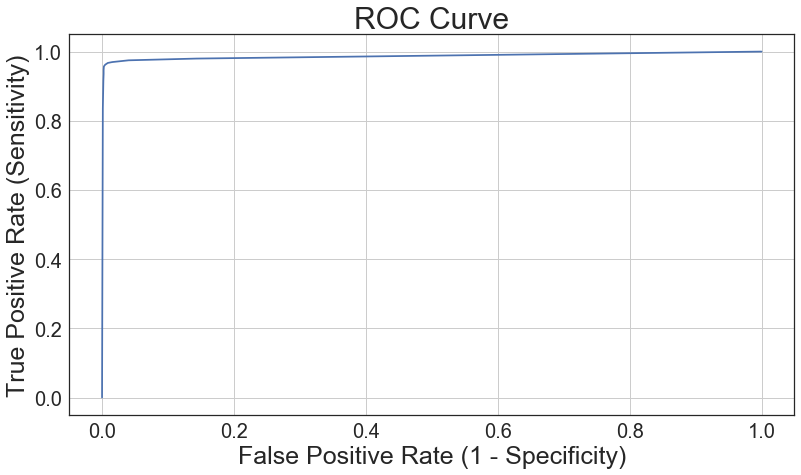

In [168]:
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_test_pred_proba[:,1])

plt.figure(figsize=(13, 7))

plt.plot(fpr_3, tpr_3)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=25)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=25)
plt.title('ROC Curve', fontsize=30)
plt.grid(True)

In [169]:
roc_auc_score(y_test, y_test_pred_proba[:,1])

0.98704046042562787